In [ ]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/Torch/chap05/data

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Torch/chap05/data


In [ ]:
# !unzip catanddog.zip -d catanddog/

In [ ]:
data_path = 'catanddog/train/'
    
transform = transforms.Compose([transforms.Resize([256, 256]), 
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(), 
                                transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(data_path, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=32, 
                                           num_workers=2, 
                                           shuffle=True)

print(f"len(train_dataset): {len(train_dataset)}")

len(train_dataset): 385


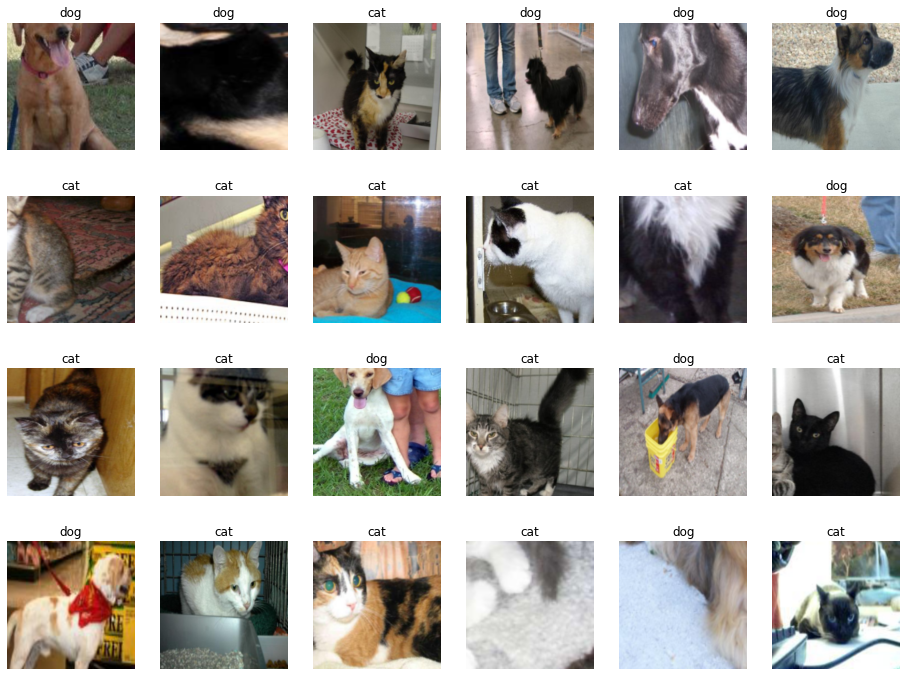

In [ ]:
# import numpy as np
# 
# samples, labels = iter(train_loader).next()
# classes = {0:'cat', 1:'dog'}
# fig = plt.figure(figsize=(16, 24))
# for i in range(24):
#     a = fig.add_subplot(4, 6, i+1)
#     a.set_title(classes[labels[i].item()])
#     a.axis('off')
#     a.imshow(np.transpose(samples[i].numpy(), (1, 2, 0)))
# plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [ ]:
resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
            
set_parameter_requires_grad(resnet18)

In [ ]:
resnet18.fc = nn.Linear(512, 2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc.weight tensor([[-0.0153, -0.0177, -0.0273,  ..., -0.0251,  0.0320, -0.0333],
        [-0.0246, -0.0084, -0.0225,  ...,  0.0269,  0.0013, -0.0412]])
fc.bias tensor([-0.0164, -0.0244])


In [ ]:
# model = models.resnet18(pretrained = True)

for param in resnet18.parameters():
    param.requires_grad = False

for param in resnet18.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(resnet18.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()    
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)        
        torch.save(model.state_dict(), os.path.join('catanddog/', '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))    
    return acc_history, loss_history

In [ ]:
params_to_update = []
for name,param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.6092 Acc: 0.6727

Epoch 1/12
----------
Loss: 0.3753 Acc: 0.8597

Epoch 2/12
----------
Loss: 0.3661 Acc: 0.8364

Epoch 3/12
----------
Loss: 0.2962 Acc: 0.8909

Epoch 4/12
----------
Loss: 0.2461 Acc: 0.8961

Epoch 5/12
----------
Loss: 0.2254 Acc: 0.9169

Epoch 6/12
----------
Loss: 0.2600 Acc: 0.8961

Epoch 7/12
----------
Loss: 0.1739 Acc: 0.9481

Epoch 8/12
----------
Loss: 0.2375 Acc: 0.8935

Epoch 9/12
----------
Loss: 0.1694 Acc: 0.9558

Epoch 10/12
----------
Loss: 0.1811 Acc: 0.9273

Epoch 11/12
----------
Loss: 0.1886 Acc: 0.9195

Epoch 12/12
----------
Loss: 0.1569 Acc: 0.9455

Training complete in 2m 7s
Best Acc: 0.955844


In [ ]:
test_path = 'catanddog/test/'

transform = transforms.Compose([transforms.Resize(224), 
                                transforms.CenterCrop(224), 
                                transforms.ToTensor()])

test_dataset = torchvision.datasets.ImageFolder(root=test_path, 
                                                transform=transform )
                                                
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=32, 
                                          num_workers=1, 
                                          shuffle=True)

print(f"len(test_dataset): {len(test_dataset)}")

len(test_dataset): 98


In [ ]:
def eval_model(model, dataloaders, device):
    since = time.time()    
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('catanddog/' + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)

            _, preds = torch.max(outputs.data, 1)           
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.eq(labels).int().sum()
            
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

In [ ]:
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['catanddog/00.pth', 'catanddog/01.pth', 'catanddog/02.pth', 'catanddog/03.pth', 'catanddog/04.pth', 'catanddog/05.pth', 'catanddog/06.pth', 'catanddog/07.pth', 'catanddog/08.pth', 'catanddog/09.pth', 'catanddog/10.pth', 'catanddog/11.pth', 'catanddog/12.pth']
Loading model catanddog/00.pth
Acc: 0.6939

Loading model catanddog/01.pth
Acc: 0.8776

Loading model catanddog/02.pth
Acc: 0.9082

Loading model catanddog/03.pth
Acc: 0.9388

Loading model catanddog/04.pth
Acc: 0.9184

Loading model catanddog/05.pth
Acc: 0.9082

Loading model catanddog/06.pth
Acc: 0.9184

Loading model catanddog/07.pth
Acc: 0.9286

Loading model catanddog/08.pth
Acc: 0.9286

Loading model catanddog/09.pth
Acc: 0.9286

Loading model catanddog/10.pth
Acc: 0.9286

Loading model catanddog/11.pth
Acc: 0.9388

Loading model catanddog/12.pth
Acc: 0.9286

Validation complete in 1m 26s
Best Acc: 0.938776


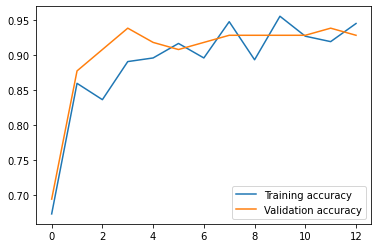

In [ ]:
plt.plot(train_acc_hist, label='Training accuracy')
plt.plot(val_acc_hist, label='Validation accuracy')
plt.legend()
plt.show()

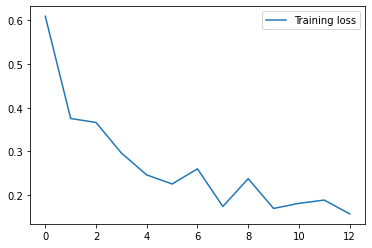

In [ ]:
plt.plot(train_loss_hist, label='Training loss')
plt.legend()
plt.show()

In [ ]:
def im_convert(tensor):  
    image=tensor.clone().detach().numpy()  
    image=image.transpose(1,2,0)  
    image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
    image=image.clip(0,1)  
    return image  

In [ ]:
classes = {0:'cat', 1:'dog'}

dataiter = iter(test_loader)  
images, labels = dataiter.next()  
output = resnet18(images)  
_, preds = torch.max(output,1) 

fig = plt.figure(figsize=(25,4))  
for idx in np.arange(20):  
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])  
    plt.imshow(im_convert(images[idx]))  
    ax.set_title(classes[labels[i].item()])
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]),
                                 str(classes[labels[idx].item()])),
                 color=("green" if preds[idx]==labels[idx] else "red"))  
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0.5)
plt.show()  

RuntimeError: ignored